<a href="https://colab.research.google.com/github/mjb627/ds301_final/blob/master/DS301_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K']

url_train = 'https://raw.githubusercontent.com/mjb627/ds301_final/master/adult-training.csv'
train = pd.read_csv(url_train, names=columns)
url_test = 'https://raw.githubusercontent.com/mjb627/ds301_final/master/adult-test.csv'
test = pd.read_csv(url_test, names=columns, skiprows=1)

In [3]:
train.shape

(32561, 15)

In [4]:
test.shape

(16281, 15)

In [5]:
train.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Some Visualizations of the columns 

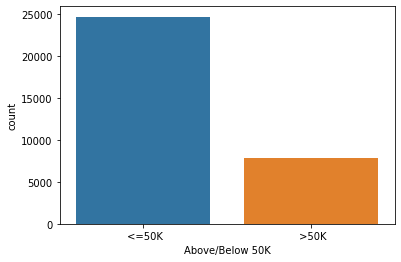

In [8]:
sns.countplot(data=train, x='Above/Below 50K')

Text(0.5, 1.0, 'Age')

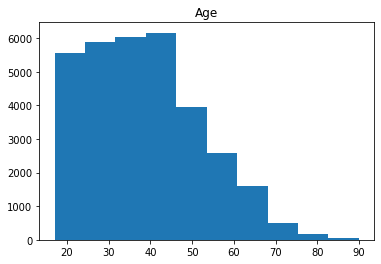

In [9]:
plt.hist(train['Age'])
plt.title('Age')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

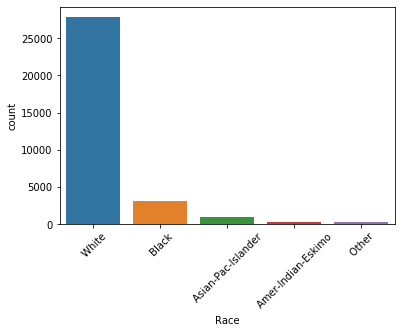

In [10]:
sns.countplot(data=train, x='Race')
plt.xticks(rotation = 45)

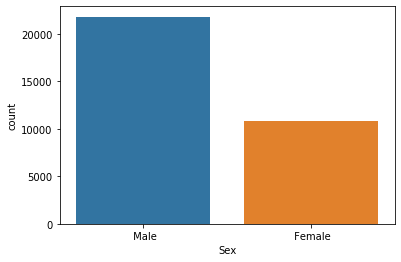

In [11]:
sns.countplot(data=train, x='Sex')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

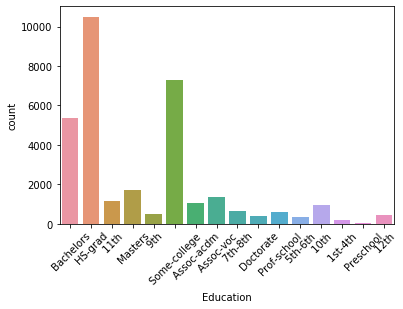

In [12]:
sns.countplot(data=train, x='Education')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

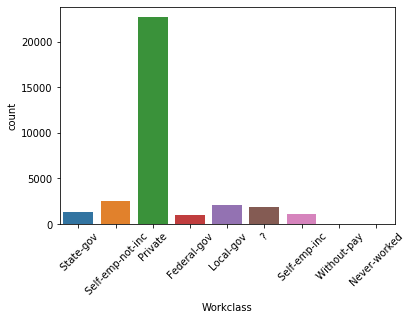

In [13]:
sns.countplot(data=train, x='Workclass')
plt.xticks(rotation = 45)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

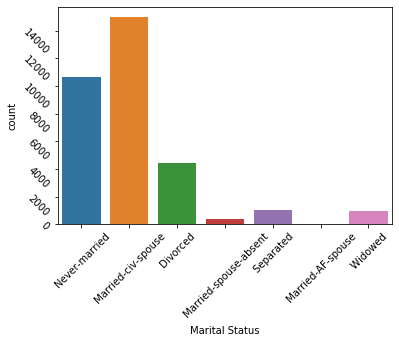

In [14]:
sns.countplot(data=train, x='Marital Status')
plt.xticks(rotation = 45)
plt.yticks(rotation = -45)

**Feature engineering**

In [15]:
train.dtypes

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50K    object
dtype: object

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                32561 non-null int64
Workclass          32561 non-null object
fnlgwt             32561 non-null int64
Education          32561 non-null object
Education Num      32561 non-null int64
Marital Status     32561 non-null object
Occupation         32561 non-null object
Relationship       32561 non-null object
Race               32561 non-null object
Sex                32561 non-null object
Capital Gain       32561 non-null int64
Capital Loss       32561 non-null int64
Hours/Week         32561 non-null int64
Country            32561 non-null object
Above/Below 50K    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age                16281 non-null int64
Workclass          16281 non-null object
fnlgwt             16281 non-null int64
Education          16281 non-null object
Education Num      16281 non-null int64
Marital Status     16281 non-null object
Occupation         16281 non-null object
Relationship       16281 non-null object
Race               16281 non-null object
Sex                16281 non-null object
Capital Gain       16281 non-null int64
Capital Loss       16281 non-null int64
Hours/Week         16281 non-null int64
Country            16281 non-null object
Above/Below 50K    16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [18]:
# ' ?' denotes missing values in this dataset
for col in train:
 if train[col].dtype == 'object':
    print(train[col].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [0]:
# Replace ' ?' with NaN
import numpy as np
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

In [20]:
# Workclass, occupation and country all have missing values
train.isnull().sum()

Age                   0
Workclass          1836
fnlgwt                0
Education             0
Education Num         0
Marital Status        0
Occupation         1843
Relationship          0
Race                  0
Sex                   0
Capital Gain          0
Capital Loss          0
Hours/Week            0
Country             583
Above/Below 50K       0
dtype: int64

In [21]:
test.isnull().sum()

Age                  0
Workclass          963
fnlgwt               0
Education            0
Education Num        0
Marital Status       0
Occupation         966
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Country            274
Above/Below 50K      0
dtype: int64

In [0]:
# Replace NaN values
train['Workclass'].fillna(' 0', inplace=True)
test['Workclass'].fillna(' 0', inplace=True)
train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)
train['Country'].fillna(' 0', inplace=True)
test['Country'].fillna(' 0', inplace=True)

In [23]:
# Will look at each column and feature engineer accordingly
train['Age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [24]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [25]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

In [0]:
# Numbers are very big. Use log function to make numbers smaller
train['fnlgwt'] = np.log10(train['fnlgwt'])

In [27]:
train['fnlgwt'].describe()

count    32561.000000
mean         5.204485
std          0.273929
min          4.089375
25%          5.071245
50%          5.251288
75%          5.374842
max          6.171640
Name: fnlgwt, dtype: float64

In [28]:
train['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [0]:
# Function to merge some values to just one variable
def merge_Education(x):
  if x in [' 1st-4th', ' 5th-6th']:
    return ' Elementary'
  elif x in [' 7th-8th']:
    return ' Middle-School'
  elif x in [' 9th', ' 10th', ' 11th', ' 12th']:
    return ' Highschool'
  else:
    return x

In [0]:
train['Education'] = train['Education'].apply(merge_Education)
test['Education'] = test['Education'].apply(merge_Education)

In [31]:
train['Education'].value_counts()

 HS-grad          10501
 Some-college      7291
 Bachelors         5355
 Highschool        3055
 Masters           1723
 Assoc-voc         1382
 Assoc-acdm        1067
 Middle-School      646
 Prof-school        576
 Elementary         501
 Doctorate          413
 Preschool           51
Name: Education, dtype: int64

In [32]:
# No description of this column. Will leave as it is.
train['Education Num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education Num, dtype: int64

In [33]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

In [0]:
# AF-spouse and spouse-absent seem similar, so I replace AF-spouse with spouse-absent.
train['Marital Status'].replace(' Married-AF-spouse', ' Married-spouse-absent', inplace=True)
test['Marital Status'].replace(' Married-AF-spouse', ' Married-spouse-absent', inplace=True)

In [35]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      441
Name: Marital Status, dtype: int64

In [36]:
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [37]:
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [38]:
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [39]:
train['Sex'].value_counts()

 Male      21790
 Female    10771
Name: Sex, dtype: int64

In [40]:
train['Capital Gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64

In [41]:
train['Capital Loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64

In [42]:
train['Hours/Week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours/Week, dtype: float64

In [43]:
train['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 0                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [0]:
# Function to merge countires by first, second/thirdworld.
def merge_Country(x):
  if x in [' Germany', ' Canada', ' Puerto-Rico', ' England', ' Italy', ' Japan', ' Portugal', ' France', ' Greece', ' Ireland', ' Outlying-US(Guam-USVI-etc)',
           ' Scotland', ' Holand-Netherlands']:
           return ' First World'
  elif x in [' United States', ' 0']:
    return ' US'
  elif x in [' Philippines', ' El-Salvador', ' India', ' Cuba', ' Jamaica', ' South', ' China', ' Dominican-Republic', ' Vietnam', ' Guatemala', ' Poland', ' Columbia', ' Taiwan', 
             ' Haiti', ' Iran', ' Nicaragua', ' Peru', ' Ecuador', ' Hong', ' Cambodia', ' Trinadad&Tobago', ' Thailand', ' Laos', ' Yugoslavia', ' Hungary', ' Honduras', ' Mexico']:
             return ' Second/Third World'
  else:
    return x 

In [0]:
train['Country'] = train['Country'].apply(merge_Country)
test['Country'] = test['Country'].apply(merge_Country)

In [46]:
train['Country'].value_counts()

 United-States         29170
 Second/Third World     2065
 First World             743
 US                      583
Name: Country, dtype: int64

In [47]:
train['Above/Below 50K'].value_counts()

 <=50K    24720
 >50K      7841
Name: Above/Below 50K, dtype: int64

In [0]:
# Changing our 2 different incomes(>50K and <=50K) to 1 and 0
train['Above/Below 50K'] = train['Above/Below 50K'].apply(lambda x: 1 if x==' >50K' else 0)
test['Above/Below 50K'] = test['Above/Below 50K'].apply(lambda x: 1 if x==' >50K.' else 0)

In [49]:
train['Above/Below 50K'].value_counts()

0    24720
1     7841
Name: Above/Below 50K, dtype: int64

**One hot encoding**

In [50]:
# Join train and test datasets for one hot encoding
combined = pd.concat([train, test], axis=0)
combined.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
0,39,State-gov,4.889391,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,4.920702,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,5.333741,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,5.370552,Highschool,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,5.529442,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Second/Third World,0


In [51]:
combined.dtypes

Age                  int64
Workclass           object
fnlgwt             float64
Education           object
Education Num        int64
Marital Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital Gain         int64
Capital Loss         int64
Hours/Week           int64
Country             object
Above/Below 50K      int64
dtype: object

In [0]:
categorical = combined.select_dtypes(include=['object']).axes[1]

In [0]:
for col in categorical:
  combined = pd.concat([combined, pd.get_dummies(combined[col], prefix = col)], axis=1)
  combined.drop(col, axis=1, inplace=True)

In [54]:
combined.head()

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week,Above/Below 50K,Workclass_ 0,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ Elementary,Education_ HS-grad,Education_ Highschool,Education_ Masters,Education_ Middle-School,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital Status_ Divorced,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Occupation_ 0,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Country_ First World,Country_ Second/Third World,Country_ US,Country_ United-States
0,39,4.889391,13,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,50,4.920702,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,38,5.333741,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,53,5.370552,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,28,5.529442,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [55]:
combined.shape

(48842, 66)

In [0]:
# Seperate back into train and test
train = combined.head(train.shape[0])
test = combined.tail(test.shape[0])

In [57]:
train.head()

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week,Above/Below 50K,Workclass_ 0,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ Elementary,Education_ HS-grad,Education_ Highschool,Education_ Masters,Education_ Middle-School,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital Status_ Divorced,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Occupation_ 0,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Country_ First World,Country_ Second/Third World,Country_ US,Country_ United-States
0,39,4.889391,13,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,50,4.920702,13,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,38,5.333741,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,53,5.370552,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,28,5.529442,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [58]:
test.head()

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week,Above/Below 50K,Workclass_ 0,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ Elementary,Education_ HS-grad,Education_ Highschool,Education_ Masters,Education_ Middle-School,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital Status_ Divorced,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Occupation_ 0,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Country_ First World,Country_ Second/Third World,Country_ US,Country_ United-States
0,25,226802.0,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,38,89814.0,9,0,0,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,28,336951.0,12,0,0,40,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,44,160323.0,10,7688,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,18,103497.0,10,0,0,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1


In [59]:
corr = train.corr()
corr['Above/Below 50K'].sort_values(ascending=False)

Above/Below 50K                       1.000000
Marital Status_ Married-civ-spouse    0.444696
Relationship_ Husband                 0.401035
Education Num                         0.335154
Age                                   0.234037
                                        ...   
Occupation_ Other-service            -0.156348
Relationship_ Not-in-family          -0.188497
Sex_ Female                          -0.215980
Relationship_ Own-child              -0.228532
Marital Status_ Never-married        -0.318440
Name: Above/Below 50K, Length: 66, dtype: float64

**Modeling**

In [0]:
# Creating train and test sets.
X_train = train.drop('Above/Below 50K', axis=1)
y_train = train['Above/Below 50K']
X_test = test.drop('Above/Below 50K', axis=1)
y_test = test['Above/Below 50K']

In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7637737239727289


In [0]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [64]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8181929856888398


In [0]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [66]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7637737239727289


In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [68]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7750138197899392


In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators=100)
rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test)

In [70]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8495792641729624


In [0]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, learning_rate=.5)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [72]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8602051471039862


In [0]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [74]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8687427062219766


In [75]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('tree',tree), ('naive',nb), ('knn',knn), ('log',logReg), ('rf',rnd), ('ada',ada), ('xgb',xgb)], voting='hard')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
    

In [76]:
from sklearn.metrics import accuracy_score
for clf in (tree, nb, knn, logReg, rnd, ada, xgb, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.778084884220871
GaussianNB 0.7637737239727289
KNeighborsClassifier 0.8181929856888398


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.7637737239727289
RandomForestClassifier 0.8481665745347338
AdaBoostClassifier 0.8602051471039862
XGBClassifier 0.8687427062219766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8560899207665377


In [77]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
model = tf.keras.Sequential([                  
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model.fit(X_train.values, y_train.values, epochs=50, batch_size=10)

Train on 32561 samples
Epoch 1/50
32561/32561 [==============================] - 6s 186us/sample - loss: 1.2919 - accuracy: 0.7437
Epoch 2/50
32561/32561 [==============================] - 6s 175us/sample - loss: 0.5521 - accuracy: 0.7592
Epoch 3/50
32561/32561 [==============================] - 6s 173us/sample - loss: 0.5521 - accuracy: 0.7592
Epoch 4/50
32561/32561 [==============================] - 6s 176us/sample - loss: 0.5521 - accuracy: 0.7592
Epoch 5/50
32561/32561 [==============================] - 6s 173us/sample - loss: 0.5521 - accuracy: 0.7592
Epoch 6/50
32561/32561 [==============================] - 6s 170us/sample - loss: 0.5521 - accuracy: 0.7592
Epoch 7/50
32561/32561 [==============================] - 6s 171us/sample - loss: 0.5521 - accuracy: 0.7592
Epoch 8/50
32561/32561 [==============================] - 5s 166us/sample - loss: 0.5521 - accuracy: 0.7592
Epoch 9/50
32561/32561 [==============================] - 6s 169us/sample - loss: 0.5521 - accuracy: 0.7592
Epoch

Modeling with scaled data


In [0]:
# Apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8524660647380382


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [85]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8221853694490511


In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [87]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7637737239727289


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [89]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8070143111602481


In [0]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators=100)
rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test)

In [91]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8484736809778269


In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, learning_rate=.5)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [93]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8584853510226644


In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [95]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8661015908113753


In [96]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('tree',tree), ('naive',nb), ('knn',knn), ('log',logReg), ('rf',rnd), ('ada',ada), ('xgb',xgb)], voting='hard')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
    

In [97]:
for clf in (tree, nb, knn, logReg, rnd, ada, xgb, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8057244640992568
GaussianNB 0.7637737239727289
KNeighborsClassifier 0.8221853694490511


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.8524660647380382
RandomForestClassifier 0.8485351022664456
AdaBoostClassifier 0.8584853510226644
XGBClassifier 0.8661015908113753


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8600208832381303


In [0]:
model = tf.keras.Sequential([                  
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
import numpy as np
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
model.fit(X_train, y_train, epochs=50, batch_size=10)

Train on 32561 samples
Epoch 1/50
32561/32561 [==============================] - 6s 184us/sample - loss: 0.3699 - accuracy: 0.8257
Epoch 2/50
32561/32561 [==============================] - 5s 168us/sample - loss: 0.3200 - accuracy: 0.8524
Epoch 3/50
32561/32561 [==============================] - 6s 187us/sample - loss: 0.3129 - accuracy: 0.8562
Epoch 4/50
32561/32561 [==============================] - 6s 188us/sample - loss: 0.3104 - accuracy: 0.8561
Epoch 5/50
32561/32561 [==============================] - 5s 163us/sample - loss: 0.3083 - accuracy: 0.8566
Epoch 6/50
32561/32561 [==============================] - 5s 167us/sample - loss: 0.3071 - accuracy: 0.8574
Epoch 7/50
32561/32561 [==============================] - 5s 163us/sample - loss: 0.3061 - accuracy: 0.8579
Epoch 8/50
32561/32561 [==============================] - 5s 167us/sample - loss: 0.3051 - accuracy: 0.8587
Epoch 9/50
32561/32561 [==============================] - 5s 167us/sample - loss: 0.3046 - accuracy: 0.8589
Epoch